# nrr95p dataset extraction process

This notebook is meant to extract the images and gifs relative to some specified years from NetCDF files.
One should already have downloaded the desired NetCDF files and placed them under the same directory of this notebook.

Import libraries.

In [1]:
import netCDF4, os, shutil
import matplotlib.pyplot as plt
import imageio.v2 as imageio

Specify the years to extract.

In [2]:
years = ['2018','2019']

For each specified year, open a local NetCDF file.

In [3]:
nc = {}
for year in years:
    nc[year] = netCDF4.Dataset('standardised-magnitude_europe_era5_daily_95th_'+year+'_v1.nc')

For each opened file, sample every point of the 'nrr95p' variable.

In [4]:
nrr95p = {}
for year in years:
    nrr95p[year] = nc[year].variables['nrr95p']

Create directories to store images and gifs.

In [5]:
for year in years:
    if not os.path.exists('nrr95p_'+year):
        os.makedirs('nrr95p_'+year)
    if not os.path.exists('nrr95p_'+year+'_gifs_a'):
        os.makedirs('nrr95p_'+year+'_gifs_a')
    if not os.path.exists('nrr95p_'+year+'_gifs_b'):
        os.makedirs('nrr95p_'+year+'_gifs_b')

For each year, make images, one for each day, and store them in their respective directory.

TypeError: can only concatenate str (not "int") to str

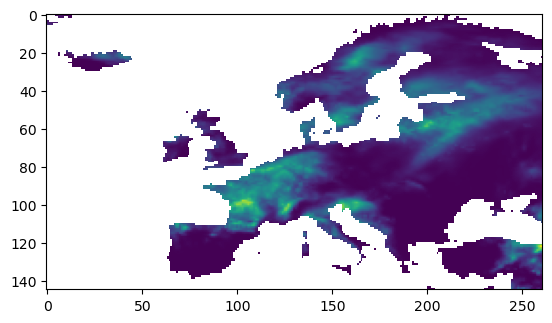

In [6]:
for year in years:
    for i in range(365):
        plt.imshow(nrr95p[year][i])
        plt.savefig('nrr95p_'+year+'/nrr95p_'+year+'_'+str(i)+'.png')
        if (i % 50) == 0:
            print('Printed image '+ str(i) + ' year ' + year)
    print('Finished year '+year)

For each year, make gifs spanning over 10 days, each day represented by a frame, from day 0 to day 364.
Each year is subdivided into 2 directories to ease sharing.

In [ ]:
for year in years:
    for i in range(356):
        images = []
        for j in range(10):
            images.append(imageio.imread('nrr95p_'+year+'/nrr95p_'+year+'_'+str(i+j)+'.png'))
        if i < 200:
            imageio.mimsave('nrr95p_'+year+'_gifs_a/nrr95p_'+year+'_'+str(i)+'_to_'+str(i+9)+'.gif', images)
        else:
            imageio.mimsave('nrr95p_'+year+'_gifs_b/nrr95p_'+year+'_'+str(i)+'_to_'+str(i+9)+'.gif', images)

Zip created directories.

In [ ]:
for year in years:
    shutil.make_archive('nrr95p_'+year+'.zip', 'zip', 'nrr95p_'+year)
    shutil.make_archive('nrr95p_'+year+'_gifs_a.zip', 'zip', 'nrr95p_'+year+'_gifs_a')
    shutil.make_archive('nrr95p_'+year+'_gifs_b.zip', 'zip', 'nrr95p_'+year+'_gifs_b')